In [25]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.pylab as pl

import os

import helpers as h

# lets you make changes to external files, which are then automatically reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# load the models
from joblib import load
models = {}

# these parameters are used to find the model you want to load

ds_duration = 900 #15*60#180
ds_period = -1
model_type = 'RF_FI'
IBSorOBS = 'OBS'
opt = 'untuned'

# or just use a favourite model that has been saved separately
fav = False


# was RFE used? if so then need to load the extra _features.joblib file
rfe = True

if fav:
    # set the favourite model here
    folder = 'Y:/Heaters/Models/LGB/Favs/untuned 2/'
    HK_folder = folder 
else:
    folder = 'Y:\\Heaters\\Models\\RF_FI\\'
    HK_folder = 'HK data/'


if ds_period < 0:
    HP_TIME_BINS = h.get_var_time_bins(ds_duration)
else:
    HP_TIME_BINS = np.arange(0, ds_duration, ds_period)

# define the coordinate system to use
#spherical
# components = ['|B|', 'phi', 'theta'] 

# cartesian
components = ['R', 'T', 'N'] 


if model_type == 'RF' or model_type == 'MLP' or model_type == 'RF_FI':
    
    models['all'] = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}.joblib")
    mapper = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_scaler.joblib")
    if rfe:
        selected_features = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_features.joblib")
else:
    

    for component in tqdm(components):
        models[component] = load(folder + f"{IBSorOBS}_{component}_{opt}_{ds_period}_{ds_duration}.joblib")
    mapper = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_scaler.joblib")
    if rfe:
        selected_features = load(folder + f"{IBSorOBS}_{component}_{opt}_{ds_period}_{ds_duration}_features.joblib")


Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestRegressor from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RobustScaler from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [27]:
selected_features

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False]

In [28]:
features = pd.read_csv(HK_folder + "features.csv", parse_dates = ['Date'])
#features = pd.read_csv('C:\\Users\\shahj\\Desktop\\2021\\v03\\features.csv', parse_dates = ['Date'])
features

,Date,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,IBS T,OBS minus IBS T,dutycycle,SCM T,...,SCM T -1,SCM T -2,SCM T -3,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1
0,2021-11-09,81,4,0,0,1,1,11,4,7,...,7.0,7.0,7.0,8.0,7.0,11.0,11.0,11.0,11.0,11.0
1,2021-11-10,82,5,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,12.0
2,2021-11-11,83,6,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,14.0
3,2021-11-12,83,7,0,0,1,1,10,4,7,...,7.0,7.0,7.0,7.0,9.0,12.0,11.0,11.0,11.0,13.0
4,2021-11-13,84,8,0,0,1,1,10,3,9,...,7.0,7.0,7.0,7.0,10.0,14.0,12.0,11.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2023-05-17,56,0,13,13,1,2,9,16,5,...,6.0,6.0,6.0,7.0,4.0,11.0,12.0,11.0,1.0,11.0
555,2023-05-18,57,1,13,12,1,1,9,5,4,...,5.0,6.0,6.0,6.0,5.0,10.0,11.0,12.0,11.0,12.0
556,2023-05-19,58,2,13,11,1,1,9,5,5,...,4.0,5.0,6.0,6.0,5.0,11.0,10.0,11.0,12.0,11.0
557,2023-05-20,60,3,13,10,1,2,9,5,5,...,5.0,4.0,5.0,6.0,4.0,12.0,11.0,10.0,11.0,11.0


In [29]:
ranges = pd.read_csv("bad_dates.csv", parse_dates=['start', 'end'])

bad_dates = h.get_forbidden_dates(ranges)

wb_features = features[~features['Date'].isin(bad_dates)]
bad_features = features[features['Date'].isin(bad_dates)]

In [30]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import re
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, RobustScaler

import glob
import h5py as h5


###########################################################################################
# Make sure these point to the right place on your system
###########################################################################################
from settings import LOCAL_HK_FOLDER, RDS_FOLDER,HP_FOLDER,EXPORT_FOLDER


###########################################################################################
# Loading the House keeping data
###########################################################################################



def get_heater_fname(date, folder = HP_FOLDER):
    if type(date) == str:
        date_str = date
    else:
        date_str = date.strftime("%Y-%m-%d")
        
    mylist = os.listdir(folder)
    # r = re.compile(r'\*2020-03-01\*.h5')
    r = re.compile(r'\w*'+ date_str + r'\w*')
    fnames = list(filter(r.match, mylist)) # Read Note below
    # fnames = glob.glob(f"{folder}/*{date_str}*.h5")
    # print(fnames)
    if len(fnames) > 0:
        return folder + '/' + sorted(fnames, key=lambda x:x[-7:-4])[-1]
    else:
        return ''


def get_HK_fname(date, folder):
    folder = folder + "/" + str(date.year) + "/"
    date_str = date.strftime("%Y%m%d")
    #! this bit is really slow!
    fnames = glob.glob(f"{folder}/*{date_str}*.txt")
    if len(fnames) > 0:
        # get the last version
        return sorted(fnames, key=lambda x:x[-6:-4])[-1]
    else:
        return ''

def local_HK_fname(hk_name, date):
    date_str = date.strftime("%Y%m%d")
    return LOCAL_HK_FOLDER + '/' + hk_name + '/' + str(date.year) + '/' + hk_name + "_" + date_str + ".csv"

def load_HK(hk_name, start, end, extension = '.txt'):
    
    fname_dates = get_dates(start, end)
    
    # load the rds file list anyway, as I might need to use it
    year = str(fname_dates[0].year)
    year_folder = RDS_FOLDER + '/' + hk_name + '/' + year
    rds_list = os.listdir(year_folder)
    
    dfs = []

    for date in fname_dates:
        date_str = date.strftime("%Y%m%d")
        
        # if this exists as a .csv then load that
        local_name = local_HK_fname(hk_name, date)
        
        if os.path.exists(local_name):
            #load the local data
            df = pd.read_csv(local_name, parse_dates = ['Time'])
            df.set_index('Time', inplace = True)
            dfs.append(df)
        else:
            # check you are in the right rds folder
            if str(date.year) != year:
                year = str(date.year)
                year_folder = RDS_FOLDER + '/' + hk_name + '/' + year
                rds_list = os.listdir(year_folder)
            
            # load rds data
            pattern = r'.*'+ date_str + r'\w*' + extension
            r = re.compile(pattern)
            # fnames = list(filter(r.match, mylist)) # Read Note below
            matches = [string for string in rds_list if re.search(pattern, string)]
            
            if len(matches) > 0:
                # get the last version
                fname = sorted(matches, key=lambda x:x[-6:-4])[-1]
                
                rds_path = RDS_FOLDER + '/' + hk_name + '/' + str(date.year) + '/' + fname
                try:
                    if hk_name == 'solo_ANC_sc-thermal-mag':
                        dtype = {
                            "IFA_HTR1_GR5_ST": str,
                            "IFA_HTR1_GR5_TSW5_ST": str,
                            "IFA_HTR2_GR5_ST": str,
                            "IFA_HTR2_GR5_TSW5_ST": str,
                            "IFA_HTR1_LCL5_TM": float,
                            "IFA_HTR2_LCL5_TM": float,
                            "IFB_HTR1_GR5_ST": str,
                            "IFB_HTR1_GR5_TSW5_ST": str,
                            "IFB_HTR2_GR5_ST": str,
                            "IFB_HTR2_GR5_TSW5_ST": str,
                            "IFB_HTR1_LCL5_TM": float,
                            "IFB_HTR2_LCL5_TM": float,
                            "ANP_1_2_2 MAG OBS": float,
                            "ANP_1_2_3 MAG IBS": float,
                            "ANP_2_1_6 MAG OBS": float,
                            "ANP_2_1_9 MAG IBS": float,
                            "ANP_3_1_13 MAG-OBS": float,
                            "ANP_3_1_14 MAG-IBS": float,
                            "ANP_1_2_2 MAG OBS RIUB": float,
                            "ANP_1_2_3 MAG IBS RIUB": float,
                            "ANP_2_1_6 MAG OBS RIUB": float,
                            "ANP_2_1_9 MAG IBS RIUB": float,
                            "ANP_3_1_13 MAG-OBS RIUB": float,
                            "ANP_3_1_14 MAG-IBS RIUB": float,
                        }
                        
                        # # now take out the two columns with continuous data and save 
                        # before June 22 2020 the datafiles are massive
                        # continuous_data = df[["IFB_HTR1_LCL5_TM", "IFB_HTR2_LCL5_TM"]].copy()
                        # on_off_data = df.drop(columns=["IFB_HTR1_LCL5_TM", "IFB_HTR2_LCL5_TM"]).dropna(how='all', axis = 0)
                    elif hk_name == 'solo_ANC_sc-lcl-mag':
                        dtype = {
                            "A_LCL2_16 MAG-B PWR ST": str,
                            "A_LCL4_17 MAG-A ST": str,
                            "A_LCL2_16 MAG-B PWR TM": float,
                            "A_LCL4_17 MAG-A TM": float,
                            "B_LCL2_16 MAG-B PWR ST": str,
                            "B_LCL4_17 MAG-A ST": str,
                            "B_LCL2_16 MAG-B PWR TM": float,
                            "B_LCL4_17 MAG-A T": float,
                        }
                    else:
                        dtype=False
                    rds_data = load_rds_file(rds_path, dtype = dtype, extension = extension)

                    
                    #save for next time
                    local_folder = LOCAL_HK_FOLDER + '/' + hk_name + '/' + str(date.year)
                    if not os.path.exists(local_folder):
                        os.makedirs(local_folder)

                    # if hk_name == 'solo_ANC_sc-thermal-mag':
                    #     continuous_data.to_csv(local_name[:-4]+ '_continous.txt')
                    #     on_off_data.to_csv(local_name[:-4]+ '_on_off.txt')
                    # else:
                        
                    rds_data.to_csv(local_name)
                    
                    dfs.append(rds_data)
                    
                except IndexError:
                    print(f'Skipped {date}')
                    pass
    
    df = pd.concat(dfs)
    
    return df

def load_rds_file(fname, dtype = False, extension = '.txt'):
    if extension == '.txt':
        names = ['Time']

        with open(fname,"r") as file_handler:
            # get the line with para descriptions
            # last [:-1] gets rid of the \n
            param_desc = file_handler.readlines()[9][:-1]
            names += param_desc.split('\t')[1:]
        if dtype is not False:
            df = pd.read_csv(fname, delimiter = '	', skiprows = 23, names=names, parse_dates=['Time'],infer_datetime_format=True, dtype = dtype)
        else:
            df = pd.read_csv(fname, delimiter = '	', skiprows = 23, names=names, parse_dates=['Time'],infer_datetime_format=True)
        # date_format = "%Y-%m-%dT%H:%M:%S.%f")
        df.set_index('Time', inplace=True)
    # elif extension == '.cdf':
        
    
    #drop all empty columns
    df.dropna(how='all',inplace=True, axis = 1)
    return df

###########################################################################################
# Helpers for generating dates
###########################################################################################

def get_dates(start, end):
    # get all the days between a start and end date
    date = start
    dates = []
    while date <= end:
        dates.append(date)
        date += timedelta(days = 1)
    return dates

def get_forbidden_dates(ranges):
    # make a list of dates with bad profiles that should not be included in training or testing
    if type(ranges) == list:
        dates = []
        for i in np.arange(0, len(ranges)):
            start = ranges[i][0]
            end = ranges[i][1]
            dates.extend(get_dates(start,end))
    elif type(ranges) == pd.DataFrame:
        dates = []
        for i, row in ranges.iterrows():
            start = row['start']
            end = row['end']
            dates.extend(get_dates(start,end))
    return dates

def random_dates(N, start, end):
    # for the training and test data I want to pick a set of random profiles
    # not sure I used this in the end...
    
    N_to_choose_from = (end-start).days
    
    if N >= N_to_choose_from:
        raise Exception("Can't choose more days then the range given")
    
    dates = get_dates(start, end)
        
    return np.random.choice(dates, N, replace=False)

###########################################################################################
# Dealing with input heater profiles
###########################################################################################

def load_profile(fname, IBSorOBS = 'OBS'):
    with h5.File(fname, 'r') as data:
        # IBS_profile = data['IBS_profile'][:]
        # IBS_time = data['IBS_time'][:]
        profile = data[f'{IBSorOBS}_profile'][:]
        time = data[f'{IBSorOBS}_time'][:]
    return time, profile

def in_sklearn_format(features, ds_duration, ds_period, IBSorOBS, hp_folder = 'C:\\Users\\shahj\\Documents\\Heaters\\heater_profiles\\', test = False):
    # Turn the heater profiles into a DataFrame that SKLearn can understand
    
    # The heater profile is first downsampled to the same time stamps, e.g. every second for 15 minutes
    # That means that we can use "Time" as a feature, since all the profiles will share the same set of times
    
    # Each day will have a value for house keeping data, e.g. Temperature of instrument
    # this is just repeated for each value of Time.
    # i.e. For the 5th second with the house keeping of such a value, what is the prediction?
    
    # if test = True then I will still build the time data and features in, but obviously I don't have a real profile so just leave that blank
    
    if ds_period < 0:
        hp_time_bins = get_var_time_bins(ds_duration)
    else:
        hp_time_bins = np.arange(0, ds_duration, ds_period)

    dfs = []
    for i, row in features.iterrows():
        date = row['Date']
        fname = get_heater_fname(date, hp_folder)
        
        if fname != '':
            time, profile = load_profile(fname, IBSorOBS)
            
        
            R = profile[:,0]
            T = profile[:,1]
            N = profile[:,2]

            hp_df = pd.DataFrame({
                'R': R,
                'T': T,
                'N': N,
                'Time': time
            })
            
            hp_df = hp_df.loc[(hp_df['Time'] < ds_duration) & (hp_df['Time'] > 0)]
            hp_df['time_bin'] = np.digitize(hp_df['Time'], bins = hp_time_bins) 
            hp_ds = hp_df.groupby('time_bin').mean()
            hp_ds.reset_index(inplace=True)
            
            #! I have a choice to make here
            #! turns out that it was only going up to the time of the real profile
            #! do I keep this, or force every profile to last to ds_duration?
            #! but I can't have a np.nan in the training data
            # going for just times of real profile
            bin_centers = (hp_time_bins[1:] + hp_time_bins[:-1])/2
            
            # because the downsampling goes one too far I think
            N_profile = hp_ds.shape[0]-1
            if bin_centers.shape[0] != hp_ds.shape[0]-1:
                times = bin_centers[:hp_ds.shape[0]-1]
            else:
                times = bin_centers
            
            profile_ds = pd.DataFrame(
                {
                    'R': hp_ds['R'].values[:N_profile],
                    'T': hp_ds['T'].values[:N_profile],
                    'N': hp_ds['N'].values[:N_profile],
                }
            )
            
            profile_ds['hp_id'] = i
            profile_ds['Time'] = times
            
            # add in all the features for that day
            for key in features.keys():
                profile_ds[key] = row[key]
            
            dfs.append(profile_ds)
            
            
        else:
            if test == True:
                # print(f'No profile on {date}')
                profile_ds = pd.DataFrame({
                    'R': np.nan,
                    'T': np.nan,
                    'N': np.nan,
                    'Time': (hp_time_bins[1:] + hp_time_bins[:-1])/2
                    })
                
                profile_ds['hp_id'] = i
            
                # add in all the features for that day
                for key in features.keys():
                    profile_ds[key] = row[key]

                dfs.append(profile_ds)
        
    data = pd.concat(dfs).reset_index(drop=True)
    return data


def features2train(features, val_features, ds_duration, ds_period, IBSorOBS, split = 'profiles', weights = False, coord = 'rtn'):
    if split == 'days':
        if val_features is None:
            val_features = features.sample(n=features.shape[0]//5, random_state = 0)
            # Create a new DataFrame with the remaining rows
            features = features[~features.index.isin(val_features.index)].copy(deep=True)
        
        # take some random points out for testing
        test_features = features.sample(n=features.shape[0]//5, random_state = 0)
        # Create a new DataFrame with the remaining rows
        train_features = features[~features.index.isin(test_features.index)].copy(deep=True)
        
        train = in_sklearn_format(train_features, ds_duration, ds_period, IBSorOBS, hp_folder = HP_FOLDER)
        val = in_sklearn_format(val_features, ds_duration, ds_period, IBSorOBS, hp_folder = HP_FOLDER)
        test = in_sklearn_format(test_features, ds_duration, ds_period, IBSorOBS, hp_folder = HP_FOLDER)
    
    elif split == 'profiles':
        if val_features is not None:
            val = in_sklearn_format(val_features, ds_duration, ds_period, IBSorOBS, hp_folder = HP_FOLDER)
        all_data = in_sklearn_format(features, ds_duration, ds_period, IBSorOBS, hp_folder = HP_FOLDER)

        if val_features is None:
            val = all_data.sample(n=all_data.shape[0]//5, random_state = 0)
            all_data = all_data[~all_data.index.isin(val.index)].copy(deep=True)
        
        train = all_data.sample(n=all_data.shape[0]//5, random_state = 0)
        test = all_data[~all_data.index.isin(train.index)].copy(deep=True)
    else:
        # I used weight for a bit, but took out. 
        # Ideally, want the weight to be equal to "how reliable is this heater profile I am learning from?"
        raise NotImplementedError
    
    # get the weights before scaling
    if weights:
        print('make weights represent the amount of variability in B on that day (i.e. how much can we trust the averaging)')
        raise NotImplementedError
        # train_weights = get_weights(train['Time'].values, ds_duration)
        # test_weights = get_weights(test['Time'].values, ds_duration)
        # val_weights = get_weights(val['Time'].values, ds_duration)
    
    
    B, phi, theta = cart2sph(
        train['R'].values,
        train['T'].values,
        train['N'].values,
    )
    train['|B|'] = B
    train['phi'] = phi
    train['theta'] = theta
    
    B, phi, theta = cart2sph(
        val['R'].values,
        val['T'].values,
        val['N'].values,
    )
    val['|B|'] = B
    val['phi'] = phi
    val['theta'] = theta
    
    B, phi, theta = cart2sph(
        test['R'].values,
        test['T'].values,
        test['N'].values,
    )
    test['|B|'] = B
    test['phi'] = phi
    test['theta'] = theta
    
    # scaling
    no_scaling_names = [
        'hp_id',
        'Heater',
        'SA change',
        'HGA azimuth change',
        'HGA evelvation change',
        'No time A off'
    ]

    mapper_list = []

    for key in train.keys():
        if any(substring in key for substring in no_scaling_names):
            mapper_list.append((key, None))
        else:
            mapper_list.append(([key], RobustScaler()))

    mapper = DataFrameMapper(mapper_list, df_out = True)



    scaler = mapper.fit(train)
    train_scaled = mapper.transform(train)
    test_scaled = mapper.transform(test)
    val_scaled = mapper.transform(val)
    
    x_train = train_scaled.drop(['hp_id', 'R', 'T', 'N', '|B|', 'phi', 'theta'],axis = 1)
    x_val = val_scaled.drop(['hp_id', 'R', 'T', 'N', '|B|', 'phi', 'theta'], axis = 1)
    x_test = test_scaled.drop(['hp_id', 'R', 'T', 'N', '|B|', 'phi', 'theta'], axis = 1)
    
    if coord == 'sph':
        y_train = train_scaled[['|B|', 'phi', 'theta']].copy()
        y_val = val_scaled[['|B|', 'phi', 'theta']].copy()
        y_test = test_scaled[['|B|', 'phi', 'theta']].copy()
    else:
        y_train = train_scaled[['R', 'T', 'N']].copy()
        y_val = val_scaled[['R', 'T', 'N']].copy()
        y_test = test_scaled[['R', 'T', 'N']].copy()
    
    if weights:
        return x_train, x_val, x_test, y_train, y_val, y_test, mapper, train_weights, test_weights, val_weights
    else:
        return x_train, x_val, x_test, y_train, y_val, y_test, mapper

###########################################################################################
# Feature manipulation
###########################################################################################

def reduce_cardinality(features, feature_name, N, bins = None):
    if bins is None:
        bins = np.linspace(features[feature_name].min(), features[feature_name].max(), N)
    features['bin'] = np.digitize(features[feature_name], bins = bins) 
    # so just radius_bin as the feature, the model doesn't need to know its true value
    features.drop([feature_name], axis = 1, inplace = True)
    features.rename(columns = {'bin': feature_name}, inplace= True)
    return features

def mode(arr, bins = 10):
    arr = arr[~np.isnan(arr)] #~ means not

    if len(arr) > 0:
        hist, bin_edges = np.histogram(arr, bins=bins)
        centers = 0.5*(bin_edges[1:]+ bin_edges[:-1])
        max_idx = np.argmax(hist)
        mode = centers[max_idx]
        return mode
    else:
        #print('Just nans')
        return np.nan

def get_weights(time, ds_duration):
    # return np.cos((np.pi/2) * time/ds_duration)
    # return np.where(time < 70, 1, 0.1)
    A = 0.5
    B = 100
    C = 10
    return (1-A) + A/(1+ np.exp((time-B)/C))

def cart2sph(r,t,n):
    # if all (0,0,0) then return 0
    
    
    mag = np.sqrt(r*r + t*t + n*n)
    theta = np.arcsin(n / mag) * 180/np.pi
    
    phi = np.arctan2(t,r) * 180/np.pi
    
    phi = np.where(r==0, 0, phi)
    theta = np.where(r==0, 0, theta)
    
    return mag, phi, theta

def add_history(features, col_name, n_days_back, bfill = True):
    for days_back in np.arange(1, n_days_back+1):
        new_col_name = col_name + f' -{days_back}'
        features[new_col_name] = features[col_name].shift(days_back)
        if bfill:
            features[new_col_name].bfill(inplace=True)
    
    # do 1 in the future too
    new_col_name = col_name + f' 1'
    features[new_col_name] = features[col_name].shift(-1)
    if bfill:
        features[new_col_name].ffill(inplace=True)
    return features

def get_var_time_bins(ds_duration):
    var_hp_time_bins = np.concatenate(
            (
                np.arange(-1, 20, 0.5),
                np.arange(20, 50, 1),
                np.arange(50, 90, 0.5),
                np.arange(90, ds_duration, 5),
            )
        )
    return var_hp_time_bins

In [31]:
features

,Date,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,IBS T,OBS minus IBS T,dutycycle,SCM T,...,SCM T -1,SCM T -2,SCM T -3,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1
0,2021-11-09,81,4,0,0,1,1,11,4,7,...,7.0,7.0,7.0,8.0,7.0,11.0,11.0,11.0,11.0,11.0
1,2021-11-10,82,5,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,12.0
2,2021-11-11,83,6,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,14.0
3,2021-11-12,83,7,0,0,1,1,10,4,7,...,7.0,7.0,7.0,7.0,9.0,12.0,11.0,11.0,11.0,13.0
4,2021-11-13,84,8,0,0,1,1,10,3,9,...,7.0,7.0,7.0,7.0,10.0,14.0,12.0,11.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2023-05-17,56,0,13,13,1,2,9,16,5,...,6.0,6.0,6.0,7.0,4.0,11.0,12.0,11.0,1.0,11.0
555,2023-05-18,57,1,13,12,1,1,9,5,4,...,5.0,6.0,6.0,6.0,5.0,10.0,11.0,12.0,11.0,12.0
556,2023-05-19,58,2,13,11,1,1,9,5,5,...,4.0,5.0,6.0,6.0,5.0,11.0,10.0,11.0,12.0,11.0
557,2023-05-20,60,3,13,10,1,2,9,5,5,...,5.0,4.0,5.0,6.0,4.0,12.0,11.0,10.0,11.0,11.0


In [32]:
# just use features for now, I want to see on everything
all_data = in_sklearn_format(features, ds_duration, ds_period, IBSorOBS, test = True)




In [33]:
B, phi, theta = h.cart2sph(
    all_data['R'].values,
    all_data['T'].values,
    all_data['N'].values,
)
all_data['|B|'] = B
all_data['phi'] = phi
all_data['theta'] = theta

invalid value encountered in divide


,R,T,N,hp_id,Time,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,...,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1,|B|,phi,theta
0,0.048344,0.038918,0.024197,0,-0.75,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.066612,38.834618,21.299960
1,0.052676,0.136172,0.097143,0,-0.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.175369,68.851852,33.637563
2,0.063314,0.207208,0.148339,0,0.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.262580,73.009094,34.397349
3,0.065921,0.265715,0.194093,0,0.75,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.335592,76.066828,35.335234
4,0.069520,0.313902,0.230390,0,1.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.395534,77.512240,35.625013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144268,-0.019269,-0.009085,0.008928,558,682.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.023098,-154.756296,22.737903
144269,-0.015549,-0.007828,0.007128,558,687.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.018811,-153.277477,22.268269
144270,-0.011798,-0.006279,0.005547,558,692.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.014470,-151.977372,22.542260
144271,-0.008129,-0.004481,0.003986,558,697.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.010102,-151.131224,23.239416


In [34]:
all_data_scaled = mapper.transform(all_data)

In [35]:
# make predictions
to_drop = ["hp_id", 'R', 'T', 'N', '|B|', 'phi', 'theta']
for key in all_data_scaled.keys():
    if "_orig" in key or "pred" in key:
        to_drop.append(key)
    all_x = all_data_scaled.drop(to_drop,axis = 1)


In [36]:


if model_type == 'RF' or model_type == 'MLP' or model_type == 'RF_FI':
    if rfe:
        # if RFE then only select those columns
        # doing this here becaues the mapper includes all the columns
        all_x = all_x.loc[:, selected_features]
    
    y_pred = models['all'].predict(all_x)
    
    for i in range(len(components)):
        index = mapper.transformed_names_.index(components[i])
        scaler = mapper.built_features[index][1]
        
        all_data_scaled[f'{components[i]}_pred'] = y_pred[:,i]
        all_data_scaled[f'{components[i]}_pred_orig'] = scaler.inverse_transform(y_pred[:,i].reshape(-1,1)).flatten()
        
else:
    # set the component you want to look at with LightGBM
    component = 'N'
    if rfe:
        all_x = all_x.loc[:, selected_features]

    y_pred = models[component].predict(all_x)

    index = mapper.transformed_names_.index(component)
    scaler = mapper.built_features[index][1]

    all_data_scaled['pred'] = y_pred 
    all_data_scaled['pred_orig'] = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

# unscale the original components
for i in range(len(components)):
    index = mapper.transformed_names_.index(components[i])
    scaler = mapper.built_features[index][1]
    all_data_scaled[components[i]+'_orig'] = scaler.inverse_transform(all_data_scaled[components[i]].values.reshape(-1,1)).flatten()

In [37]:
# try to see if it got |B| right
all_data_scaled['|B|_orig'] = np.sqrt(all_data_scaled['R_orig']**2 + all_data_scaled['T_orig']**2 + all_data_scaled['N_orig']**2)
all_data_scaled['|B|_pred_orig'] = np.sqrt(all_data_scaled['R_pred_orig']**2 + all_data_scaled['T_pred_orig']**2 + all_data_scaled['N_pred_orig']**2)

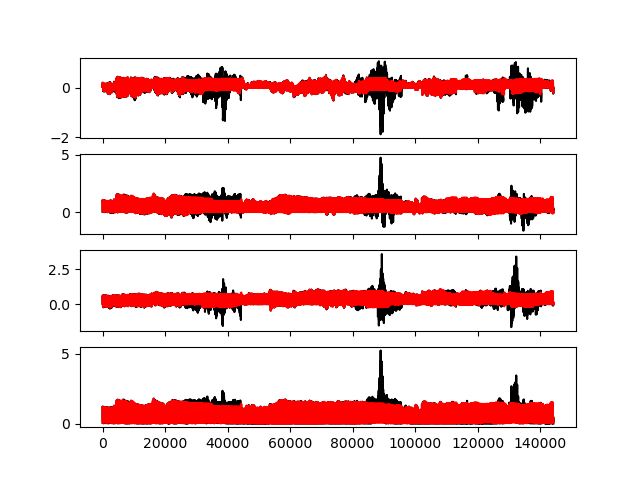

In [38]:

if model_type == 'RF'  or model_type == 'MLP' or model_type == 'RF_FI':
    fig, axs = plt.subplots(4,1, sharex=True)

    axs[0].plot(all_data_scaled['R_orig'], color = 'black')
    axs[0].plot(all_data_scaled['R_pred_orig'], color = 'red')
    
    axs[1].plot(all_data_scaled['T_orig'], color = 'black')
    axs[1].plot(all_data_scaled['T_pred_orig'], color = 'red')
    
    axs[2].plot(all_data_scaled['N_orig'], color = 'black')
    axs[2].plot(all_data_scaled['N_pred_orig'], color = 'red')
    
    axs[3].plot(all_data_scaled['|B|_orig'], color = 'black')
    axs[3].plot(all_data_scaled['|B|_pred_orig'], color = 'red')


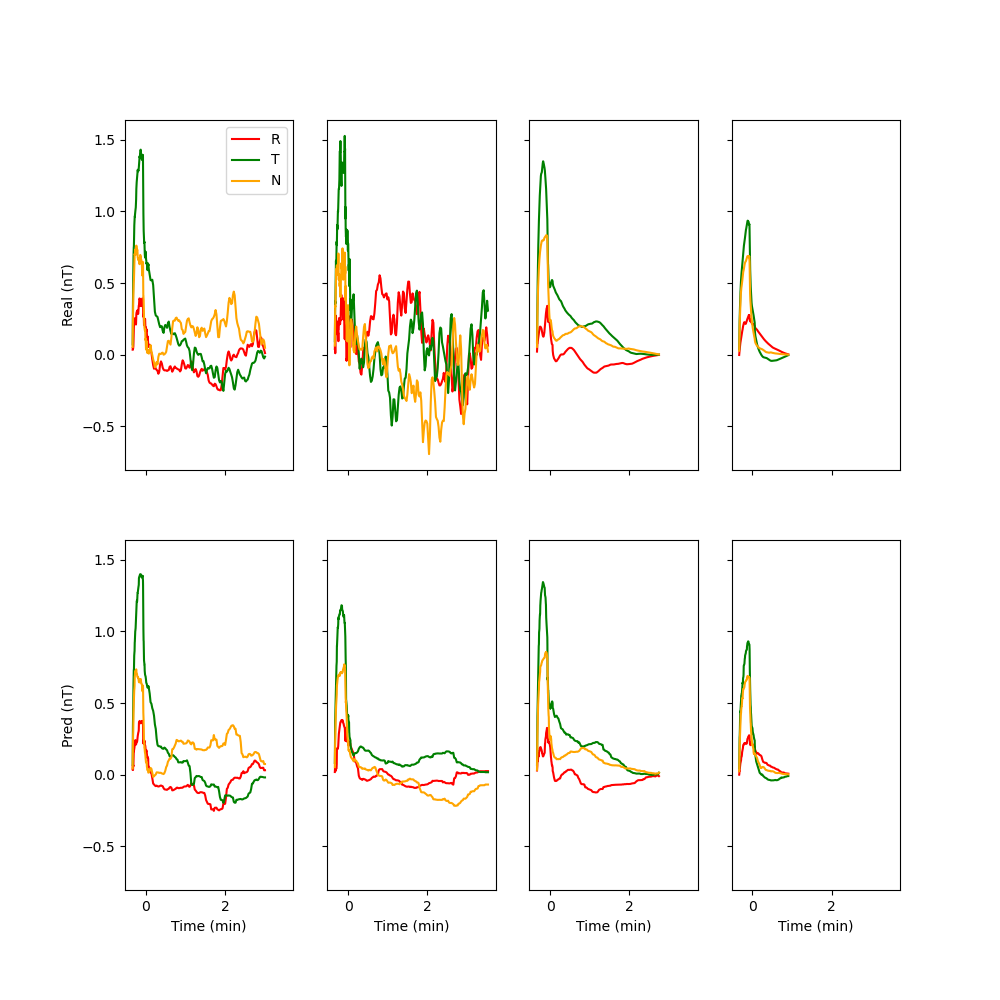

ValueError: 5 is not a valid MouseButton

In [39]:
columns = 4

fig, axs = plt.subplots(2, columns,sharex=True, sharey=True, figsize = (10,10))

idx = 0

colors = ['red', 'green', 'orange']
# change to bad_features to test on unseen features that are defo wrong
# dates_to_plot = bad_features.sample(n = rows*columns, random_state = 1)

# sample from just test days
unseen_features = features.loc[(features['Date'] < datetime(2023,1,1))]
dates_to_plot = unseen_features.sample(n = 2*columns)



for column in np.arange(0, columns):
    selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == dates_to_plot.index[idx]]
    
    for i in range(len(components)):
        
        axs[0][column].plot(selected_day['Time'], selected_day[components[i]+'_orig'].values, color = colors[i])
        
        axs[1][column].plot(selected_day['Time'], selected_day[components[i]+'_pred_orig'].values, color = colors[i])
    
    idx +=1


axs[0][0].set_ylabel('Real (nT)')
axs[1][0].set_ylabel('Pred (nT)')
axs[0][0].legend(components)


for column in np.arange(columns):
    axs[-1][column].set_xlabel("Time (min)")

KeyError: 'Date'

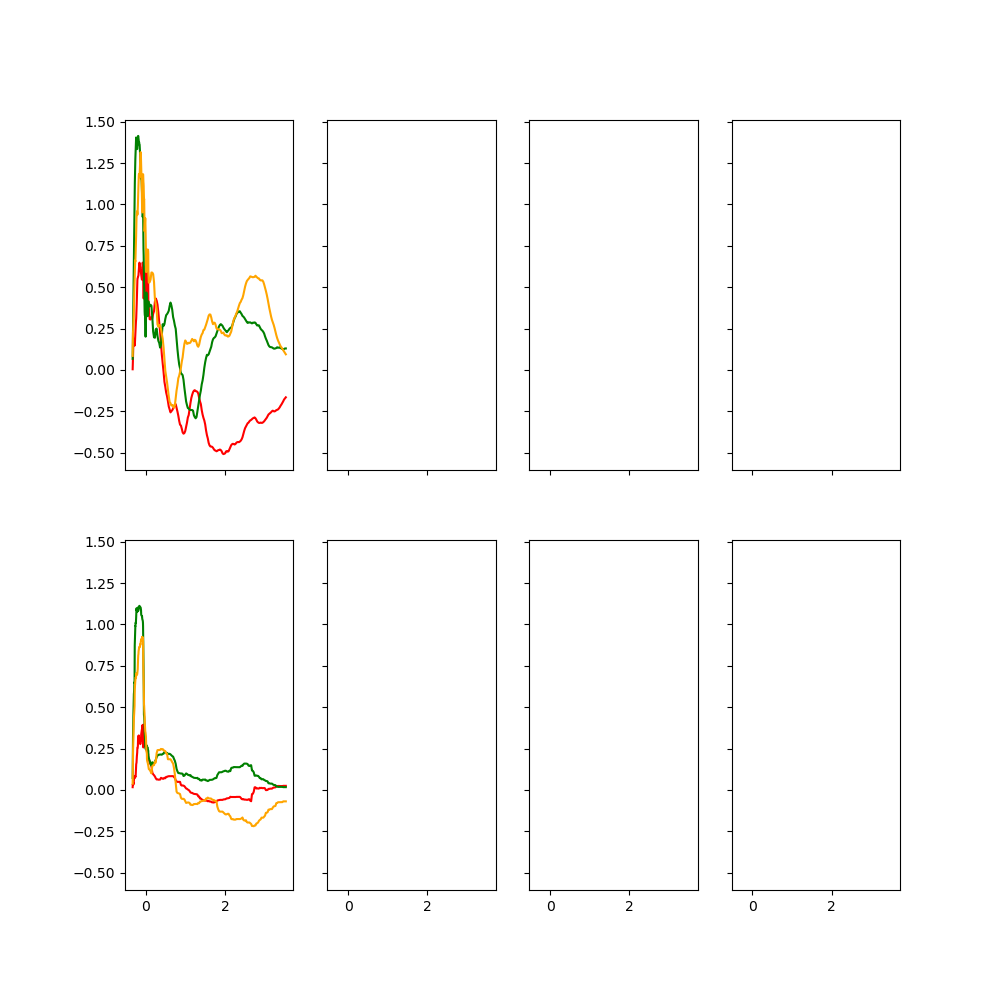

In [58]:
columns = 4

fig, axs = plt.subplots(2, columns,sharex=True, sharey=True, figsize = (10,10))

idx = 0

colors = ['red', 'green', 'orange']
# change to bad_features to test on unseen features that are defo wrong
# dates_to_plot = bad_features.sample(n = rows*columns, random_state = 1)

# sample from just test days
unseen_features = features.loc[(features['Date'] < datetime(2022,11,13)) & (features['Date'] > datetime(2022,8,19))]
dates_to_plot = unseen_features.sample(n = 2*columns)



for column in np.arange(0, columns):
    selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == dates_to_plot.index[idx]]
    
    for i in range(len(components)):
        
        axs[0][column].plot(selected_day['Time'], selected_day[components[i]+'_orig'].values, color = colors[i])
        
        axs[1][column].plot(selected_day['Time'], selected_day[components[i]+'_pred_orig'].values, color = colors[i])
    idx +=1
    print(selected_day['Date'])


axs[0][0].set_ylabel('Real (nT)')
axs[1][0].set_ylabel('Pred (nT)')



for column in np.arange(columns):
    axs[-1][column].set_xlabel("Time (min)")

In [61]:
selected_day



,R,T,N,hp_id,Time,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,...,R_pred_orig,T_pred,T_pred_orig,N_pred,N_pred_orig,R_orig,T_orig,N_orig,|B|_orig,|B|_pred_orig
86283,-0.298777,-0.432837,-0.240809,327,-0.335526,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.016636,-0.425299,0.072378,-0.325945,0.038059,0.004033,0.067136,0.084915,0.108324,0.083450
86284,-0.237083,-0.368478,-0.148541,327,-0.333333,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.031969,-0.304538,0.156358,-0.235584,0.087791,0.017720,0.111893,0.135696,0.176770,0.182146
86285,-0.135786,-0.288822,-0.049500,327,-0.331140,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.034322,-0.232978,0.206123,-0.165647,0.126282,0.040192,0.167287,0.190205,0.256473,0.244155
86286,-0.025285,-0.221132,0.000131,327,-0.328947,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.030495,-0.168126,0.251222,-0.104863,0.159735,0.064706,0.214361,0.217521,0.312174,0.299262
86287,0.080077,-0.152454,0.022412,327,-0.326754,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.038428,-0.065601,0.322520,-0.020044,0.206417,0.088081,0.262121,0.229784,0.359536,0.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86589,-1.214287,-0.347564,-0.163207,327,3.450658,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.023348,-0.502669,0.018574,-0.529183,-0.073796,-0.199070,0.126437,0.127625,0.268148,0.079599
86590,-1.170728,-0.350100,-0.179059,327,3.472588,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.024804,-0.504938,0.016995,-0.520536,-0.069037,-0.189406,0.124673,0.118900,0.256038,0.075301
86591,-1.121791,-0.347182,-0.194942,327,3.494518,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.024804,-0.504938,0.016995,-0.520536,-0.069037,-0.178550,0.126703,0.110159,0.245089,0.075301
86592,-1.091229,-0.342533,-0.211066,327,3.516447,-3.26087,1.604651,-0.034483,0.0,0.0,...,0.024804,-0.504938,0.016995,-0.520536,-0.069037,-0.171770,0.129935,0.101285,0.238006,0.075301


In [40]:
from sklearn.metrics import mean_absolute_error

all_data_scaled.dropna(inplace=True)

# Calculate the MAE for each component
mae = {}
for component in ['|B|','R', 'T', 'N']:
    mae[component] = mean_absolute_error(all_data_scaled[component+'_orig'], all_data_scaled[component+'_pred_orig'])

# Calculate the overall accuracy score
accuracy_score = mae

accuracy_score


{'|B|': 0.13874304691801811,
 'R': 0.07305501440857795,
 'T': 0.13335945819833847,
 'N': 0.10400610398457937}

In [41]:
print(all_x.columns)

Index(['Time', 'Radius', 'time_since_T_high', 'time_it_was_high', 'cumulative',
       'IBS T', 'dutycycle', 'time_since_T_high -1', 'time_since_T_high -2',
       'time_since_T_high -3', 'time_since_T_high -4', 'time_since_T_high 1',
       'cumulative -3', 'cumulative -4', 'cumulative 1', 'dutycycle -1',
       'SCM T -1', 'SCM T -2', 'SCM T -4', 'SCM T 1'],
      dtype='object')


In [42]:
component = 'all'

dates = h.get_dates(datetime(2021,10,15), datetime(2021,11,30))

dfs = []

for date in dates:
    date_str = date.strftime("%Y-%m-%d")
    selected = features.loc[features['Date'] == date_str]
    
    if not selected.empty:  # Check if the selected DataFrame is not empty
        test_profile = all_data.loc[all_data['hp_id'] == selected.index.values[0]].copy()
        test_profile.drop(["hp_id", 'R', 'T', 'N'], axis=1, inplace=True)
        dfs.append(test_profile)
    
test_X = pd.concat(dfs)
test_X.reset_index(drop=True, inplace=True)
if 'pred' in test_X.keys():
    test_X.drop(columns=['pred'], inplace=True)


In [43]:
models


{'all': RandomForestRegressor()}

In [44]:
# build 2d arrays
N = features.shape[0]

component = '|B|'

real_2d = np.ones((len(HP_TIME_BINS), N))*np.nan
pred_2d = np.ones((len(HP_TIME_BINS), N))*np.nan

# I also need to save the train idc from HPC
# for now just plot everything

for i in tqdm(features.index):
    selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == i]

    if i not in bad_features.index:
        # if too short then pad with np.nan
        if selected_day.shape[0] < len(HP_TIME_BINS):
            real_2d[:selected_day.shape[0], i] = selected_day[component+'_orig'].values
        else:
            real_2d[:, i] = selected_day[component+'_orig'].values
    else:
        # print(bad_features.loc[i, 'Date'])
        # this is a bad time, so don't show the profile
        real_2d[:, i] = np.nan
            
    # just fill in all the predictions
    if selected_day.shape[0] < len(HP_TIME_BINS):
        pred_2d[:selected_day.shape[0], i] = selected_day[component+'_pred_orig'].values
    else:
        pred_2d[:, i] = selected_day[component+'_pred_orig'].values

# for i in tqdm(features.index):
#     selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == i]
    
#     # if too short then pad with np.nan
#     if selected_day.shape[0] < len(HP_TIME_BINS):
#         real_2d[:selected_day.shape[0], i] = selected_day[component+'_orig'].values
#     else:
#         real_2d[:, i] = selected_day[component+'_orig'].values
            
#     # just fill in all the predictions
#     if selected_day.shape[0] < len(HP_TIME_BINS):
#         pred_2d[:selected_day.shape[0], i] = selected_day['pred_orig'].values
#     else:
#         pred_2d[:, i] = selected_day['pred_orig'].values

100%|██████████| 559/559 [00:00<00:00, 723.04it/s]


All-NaN slice encountered
All-NaN slice encountered


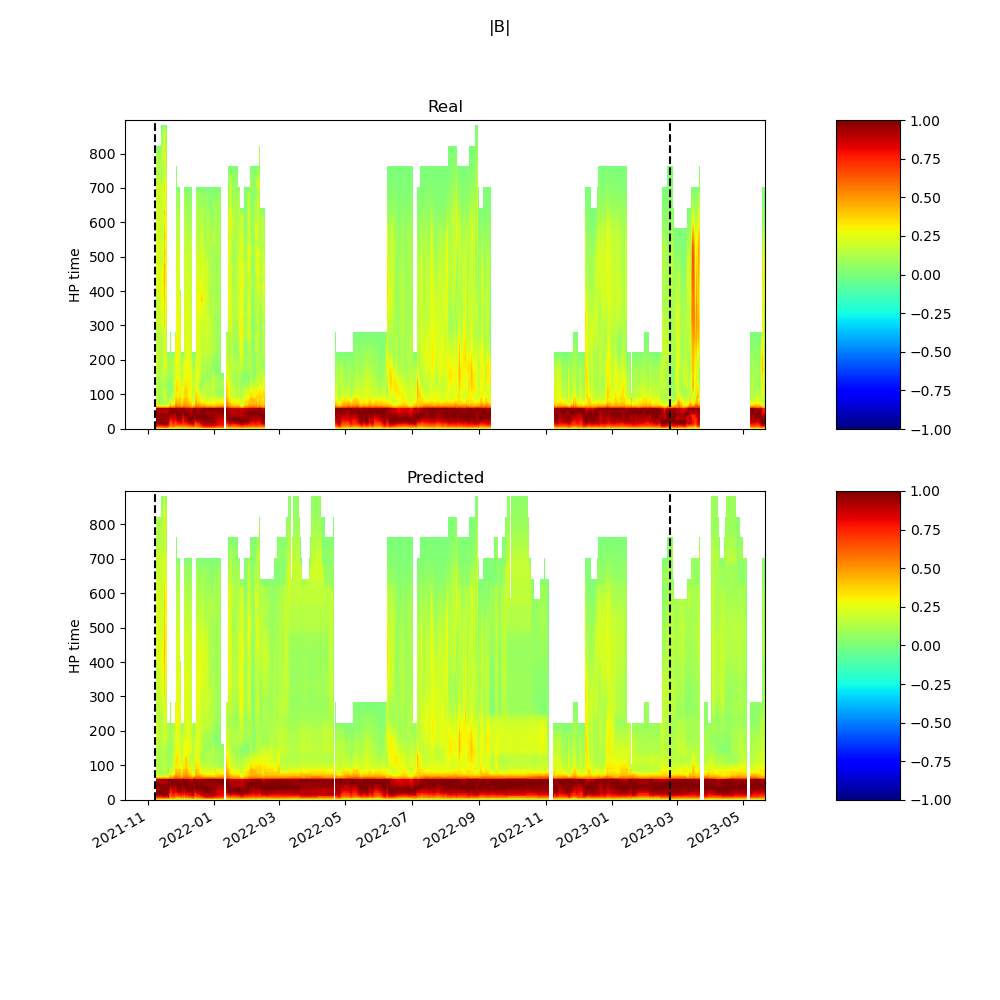

In [45]:
%matplotlib ipympl
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios = [10,1])
# Create the Axes.
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0], sharex=ax0, sharey=ax0)
cax0 = fig.add_subplot(gs[0, 1])
cax1 = fig.add_subplot(gs[1, 1])


cmap = 'jet'

if component in ['R', 'T', 'N']:
    vmax = 1
    vmin = -1

if component == 'phi':
    vmax = 180
    vmin = -180

elif component == 'theta':
    vmax = 90
    vmin = -90

elif component == '|B|':
    vmax = 2
    vmin = 0

if cmap == 'seismic':
    # normalise horizontally
    # vmax = np.nanmax(real_2d)
    # vmin = np.nanmin(real_2d)
    # ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = vmax, vmin = vmin)
    # ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = vmax, vmin = vmin)
    # normalise by max value in each heater profile
    cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax0)

    cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax1)
    
if cmap == 'diff':

    cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = 'jet', vmax = 1, vmin = -1)
    plt.colorbar(cb, cax = cax0)

    cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d - pred_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax1)

elif cmap == 'jet':
    # normalise by max value in each heater profile
    if 'R' in components:
        cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = 1, vmin = -1)
    else:
        cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = cmap, vmax = vmax, vmin = vmin)
    plt.colorbar(cb, cax = cax0)

    if 'R' in components:
        cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d/np.nanmax(abs(pred_2d), axis = 0), cmap = cmap, vmax = 1, vmin = -1)
    else:
        cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d, cmap = cmap, vmax = vmax, vmin = vmin)
    plt.colorbar(cb, cax = cax1)


for ax in [ax0, ax1]:
    # ax.axvline(datetime(2022,12,31), color = 'black', ls = '--')
    
    ax.axvline(datetime(2023,2,23), color = 'black', ls = '--')
    
    ax.axvline(datetime(2021,11,8), color = 'black', ls = '--')

ax0.set_title('Real')
ax1.set_title('Predicted')
ax0.set_ylabel('HP time')
ax1.set_ylabel('HP time')


fig.suptitle(component)

fig.autofmt_xdate()

In [46]:
import shap
shap.initjs()
if component in models:
    explainer = shap.TreeExplainer(models[component])
    shap_values = explainer.shap_values(test_X)
else:
    print(f"Invalid component: {component}")


Invalid component: |B|


NameError: name 'shap_values' is not defined

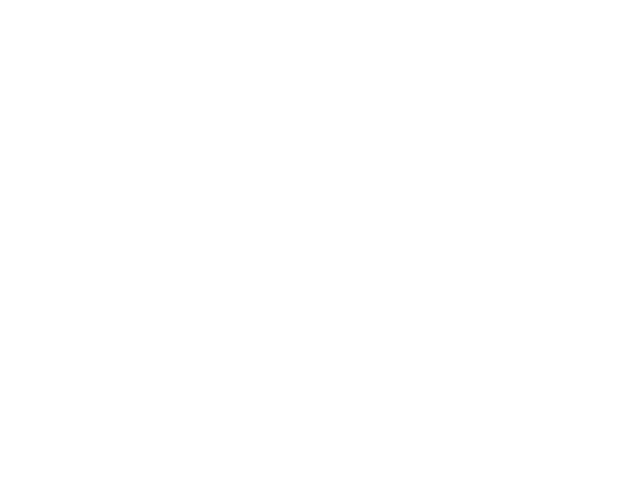

In [47]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, test_X)
for ax in axs.flatten():
    print(ax.get_title())

In [ ]:
#make a graph that shows what effects the heater profiles over time https://chat.openai.com/c/56ca517c-83b3-4e1a-a207-201ac2a76062